In [1]:
pip install pillow easyocr textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 9.9 MB/s eta 0:00:00


In [18]:
from google.colab import files
import os

uploaded = files.upload()


meme_files = list(uploaded.keys())
print(f"Successfully uploaded: {meme_files}")

Saving meme3.jpg to meme3 (2).jpg
Saving meme2.jpg to meme2 (2).jpg
Saving meme1.jpg to meme1 (3).jpg
Successfully uploaded: ['meme3 (2).jpg', 'meme2 (2).jpg', 'meme1 (3).jpg']


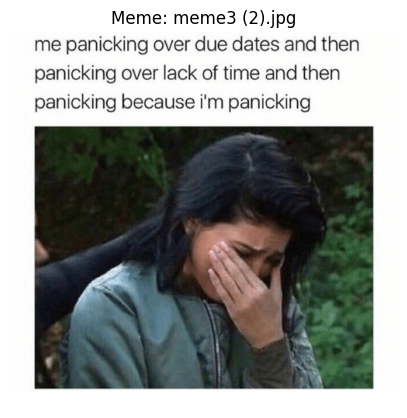

Raw OCR: me panicking over due dates and then panicking over lack of time and then panicking because i'm panicking
Cleaned Text: me packing over due dates and then packing over lack of time and then packing because i'm packing
Polarity: -0.12 | Subjectivity: 0.38
Vibe: Negative
--------------------------------------------------


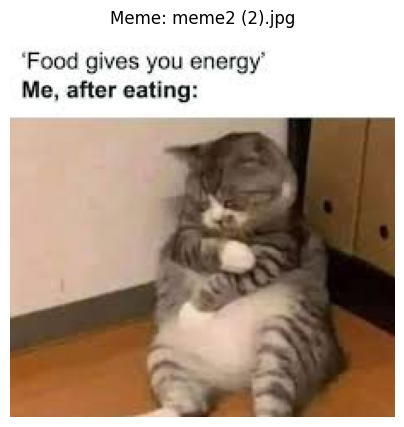

Raw OCR: Food gives You energy' Me, after eating:
Cleaned Text: Good gives You energy' He, after eating:
Polarity: 0.70 | Subjectivity: 0.60
Vibe: Positive
--------------------------------------------------


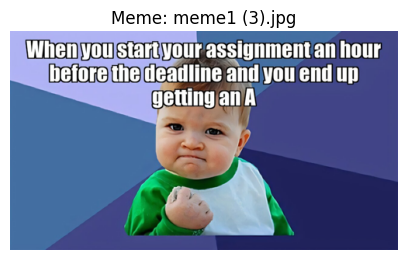

Raw OCR: Wenvoustartvour assignmentan hour pefore te deadline andvou end up getinganA
Cleaned Text: Wenvoustartvour assignment hour before te deadline andros end up getinganA
Polarity: 0.00 | Subjectivity: 0.00
Vibe: Neutral
--------------------------------------------------


In [19]:


import easyocr
from PIL import Image
from textblob import TextBlob
import matplotlib.pyplot as plt
import torch
import re

device = True if torch.cuda.is_available() else False
reader = easyocr.Reader(['en'], gpu=device)

def clean_text(text):
    text = text.replace('\n', ' ').strip()
    cleaned = str(TextBlob(text).correct())
    return cleaned

def process_meme(file_path):
    img = Image.open(file_path)
    img.thumbnail((500, 500))

    results = reader.readtext(file_path, detail=0)
    raw_text = " ".join(results)

    final_text = clean_text(raw_text)

    analysis = TextBlob(final_text)
    pol = analysis.sentiment.polarity
    sub = analysis.sentiment.subjectivity

    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Meme: {file_path}")
    plt.show()

    print(f"Raw OCR: {raw_text}")
    print(f"Cleaned Text: {final_text}")
    print(f"Polarity: {pol:.2f} | Subjectivity: {sub:.2f}")

    if pol > 0:
        print("Vibe: Positive")
    elif pol < 0:
        print("Vibe: Negative")
    else:
        print("Vibe: Neutral")

    print("-" * 50)

for filename in uploaded.keys():
    try:
        process_meme(filename)
    except Exception as e:
        print(f"Error processing {filename}: {e}")